In [1]:
import geopandas
import starepandas
import numpy
import pystare
import matplotlib.pyplot as plt

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['geom_simple'] = world.simplify(0.002)
#us.set_geometry('geom_simple', inplace=True)

In [17]:
world = starepandas.STAREDataFrame(world, add_stare=True, level=8, add_trixels=True)

<IPython.core.display.Javascript object>


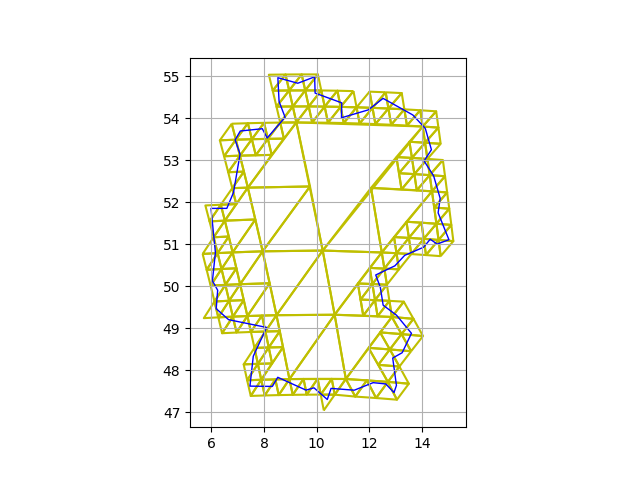

<AxesSubplot:>

In [22]:
fig, ax = plt.subplots()
ax.grid(True)

country = world[world.name=='Germany']
country.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
country.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)

In [19]:
continent = world[world.continent=='Asia']
continent = world[world.continent=='Africa']
continent = world[(world.name=='Egypt') | (world.name=='Libya') | 
                  (world.name=='Chad') | (world.name=='Sudan') | 
                  (world.name=='Algeria') | (world.name=='Niger') |
                  (world.name=='Nigeria') | (world.name=='Eritrea') ]

continent = world[world.continent=='South America']

In [20]:
sids = numpy.concatenate(list(continent['stare']))
sids = numpy.unique(sids)
s_range = pystare.to_compressed_range(sids)
sids = pystare.expand_intervals(s_range , -1, multi_resolution=True)

df = starepandas.STAREDataFrame(stare=[sids], add_trixels=True)

<IPython.core.display.Javascript object>


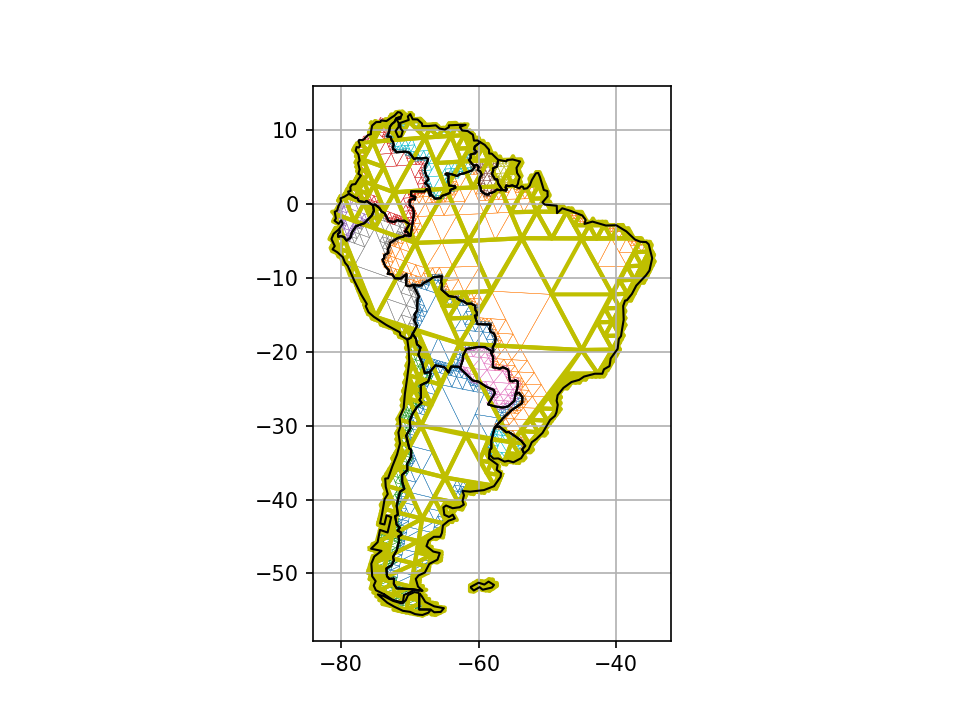

<AxesSubplot:>

In [21]:
%matplotlib notebook

fig, ax = plt.subplots(dpi=150)
ax.grid(True)

continent.plot(ax=ax, trixels=True, boundary=True, column='name', zorder=0, linewidth=0.2)
df.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=1, linewidth=2)
continent.plot(ax=ax, facecolor="none", edgecolor='black', zorder=2)

In [ ]:
# Manual

In [8]:
def merge_stare(block):        
    sids = numpy.concatenate(list(block))          
    sids = numpy.unique(sids)
    s_range = pystare.to_compressed_range(sids)
    sids = pystare.expand_intervals(s_range , -1, multi_resolution=True)
    return list(sids)

In [9]:
g = world.groupby(group_keys=True, by='continent')['stare'].agg(merge_stare)
sdf = starepandas.STAREDataFrame(g, stare='stare')
sdf

,stare
continent,
Africa,"[2814749767106565, 4503599627370500, 675539944..."
Antarctica,"[1911778041818775557, 1912340991772196869, 191..."
Asia,"[288230376151711747, 299489375220137989, 30005..."
Europe,"[648518346341351429, 650207196201615365, 90071..."
North America,"[1171498853069750277, 1173187702930014213, 117..."
Oceania,"[153122387330596868, 158188936911388677, 16044..."
Seven seas (open ocean),"[507217908032602117, 508343807939444741]"
South America,"[1807069350482411525, 1807632300435832837, 181..."


In [10]:
aggregated_data = world.drop(columns=['stare', 'trixels'], errors='ignore').groupby(by='continent').agg('first')
aggregated_data

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,53950935,Tanzania,TZA,150600.0,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699..."
Antarctica,4050,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.661 -78.047, -48.151 -78.0..."
Asia,18556698,Kazakhstan,KAZ,460700.0,"POLYGON ((87.360 49.215, 86.599 48.549, 85.768..."
Europe,142257519,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
North America,35623680,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0..."
Oceania,920938,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.000 -16.067, 180.000 -16.5..."
Seven seas (open ocean),140,Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5..."
South America,44293293,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1..."


In [11]:
aggregated = sdf.join(aggregated_data)
aggregated

,stare,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,,
Africa,"[2814749767106565, 4503599627370500, 675539944...",53950935,Tanzania,TZA,150600.0,"POLYGON ((33.904 -0.950, 34.073 -1.060, 37.699..."
Antarctica,"[1911778041818775557, 1912340991772196869, 191...",4050,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.661 -78.047, -48.151 -78.0..."
Asia,"[288230376151711747, 299489375220137989, 30005...",18556698,Kazakhstan,KAZ,460700.0,"POLYGON ((87.360 49.215, 86.599 48.549, 85.768..."
Europe,"[648518346341351429, 650207196201615365, 90071...",142257519,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
North America,"[1171498853069750277, 1173187702930014213, 117...",35623680,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.840 49.000, -122.974 49.0..."
Oceania,"[153122387330596868, 158188936911388677, 16044...",920938,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.000 -16.067, 180.000 -16.5..."
Seven seas (open ocean),"[507217908032602117, 508343807939444741]",140,Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5..."
South America,"[1807069350482411525, 1807632300435832837, 181...",44293293,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.634 -52.636, -68.250 -53.1..."


# High levle functions

In [15]:
world.stare_dissolve(by='continent', aggfunc='sum')

,stare,geometry,pop_est,gdp_md_est
continent,,,,
Africa,"[2814749767106565, 4503599627370500, 675539944...","MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238,6025295.50
Antarctica,"[1911778041818775557, 1912340991772196869, 191...","MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050,810.00
Asia,"[288230376151711747, 299489375220137989, 30005...","MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868,55434607.77
Europe,"[648518346341351429, 650207196201615365, 90071...","MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461,25284877.00
North America,"[1171498853069750277, 1173187702930014213, 117...","MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112,23505137.00
Oceania,"[153122387330596868, 158188936911388677, 16044...","MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844,1412885.00
Seven seas (open ocean),"[507217908032602117, 508343807939444741]","POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140,16.00
South America,"[1807069350482411525, 1807632300435832837, 181...","MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749,6377091.80


In [16]:
world.dissolve(by='continent', aggfunc='sum', as_index='True', observed=False)

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238,6025295.50
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050,810.00
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868,55434607.77
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461,25284877.00
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112,23505137.00
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844,1412885.00
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140,16.00
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749,6377091.80
